#                                    数据挖掘大作业

In [25]:
from pandas import Series,DataFrame,np
from numpy import nan as NA
import pandas as pd
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt


#1.加载数据
def load_data(path,filename):
    return pd.read_csv(path + '/' + filename)
root = 'E:\oakland-crime-statistics-2011-to-2016'
data = load_data(root,'records-for-2011.csv')#中文
data2 = load_data(root,'records-for-2011.csv')#中文

#2.缺失数据统计 -列
data.isnull().sum()
print("每列缺失的数据个数分别为:")
print(data.isnull().sum())

e:\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


每列缺失的数据个数分别为:
Agency                         1
Create Time                    1
Location                       0
Area Id                      904
Beat                         520
Priority                       1
Incident Type Id               1
Incident Type Description      1
Event Number                   1
Closed Time                    7
dtype: int64


In [27]:
#3.缺失值填补-根据不同属性特点，分为三种方法
#3.1根据属性之间的相关关系填补缺失值
print("Area Id和Beat根据Location值进行填补")
# 查看Area Id,Beat特征缺失处对应的
#包含Area Id,Beat所需要的信息的Location特征的具体情况
area_locationdes=data.loc[data['Area Id'].isnull(), 'Location']
beat_locationdes=data.loc[data['Beat'].isnull(), 'Location']
# 左边为Area Id,Beat特征缺失信息的具体位置，
#利用字符串提取来补充Area Id的缺失信息
data.loc[data['Area Id'].isnull(), 'Area Id'] 
 = [str(x)[0: len(str(x))] for x in area_locationdes]
data.loc[data['Beat'].isnull(), 'Beat'] 
 = [str(y)[0: len(str(y))] for y in beat_locationdes]
#print("填补后Area Id缺失个数为:",data['Area Id'].isnull().sum())
#print("填补后Beat缺失个数为:",data['Beat'].isnull().sum())


Area Id和Beat根据Location值进行填补


In [28]:
#3.2删除缺失值-Agency,Create Time,Priority,ITI,ITD,Event Number
#各缺失一个值，且在同一行180015，故删除该行即可
print("Agency,Create Time,Priority,ITI,ITD,Event Number删除缺失值")
#因为缺失值位于同一行，所以用Agency代表
data=data.dropna(axis=0,subset=['Agency'])

Agency,Create Time,Priority,ITI,ITD,Event Number删除缺失值


In [30]:
#3.3用前一个非缺失数据填充
print("Closed Time用前一个非缺失数据填充")
data['Closed Time']=data['Closed Time'].fillna(method='ffill')

#检验缺失值处理后是否还存在缺失值
print("填补后数据的缺失个数分别为:\n",data.isnull().sum())

Closed Time用前一个非缺失数据填充
填补后数据的缺失个数分别为:
 Agency                       0
Create Time                  0
Location                     0
Area Id                      0
Beat                         0
Priority                     0
Incident Type Id             0
Incident Type Description    0
Event Number                 0
Closed Time                  0
dtype: int64


In [31]:
#4.删除重复数据
print("删除重复数据")
#去重,默认保留前一个
df=data.drop_duplicates()


print("处理后的数据行列为:",df.shape)
#print("处理后的数据为:",df)

删除重复数据
处理后的数据行列为: (180015, 10)


In [32]:
#6. 统计一下各属性的频数和频率
#6.1 Area Id频数和频率
se_ai=pd.Series(data2['Area Id'])
count_ai=dict(se_ai.value_counts())
proport_ai = dict(se_ai.value_counts(normalize=True))
print("Area Id的频数为:")
print(count_ai)
print("Area Id的频率为:")
print(proport_ai)
print("\n")

Area Id的频数为:
{1.0: 79152, 2.0: 67261, 3.0: 32699}
Area Id的频率为:
{1.0: 0.4419134396355353, 2.0: 0.3755248112912591, 3.0: 0.1825617490732056}




In [33]:
# #6.2 Location各区域的频数和频率
se_location=pd.Series(df['Location'])
count_location=dict(se_location.value_counts())
proport_location = dict(se_location.value_counts(normalize=True))
print("Location位于前十名的频数分别为:")
for i,(key,value) in enumerate(count_location.items()):
    if i in range(0,10):
       print(key,value)
print("Location位于前十名的频率分别为:")
for i,(key,value) in enumerate(proport_location.items()):
    if i in range(0,10):
       print(key,value)
print("\n")

Location位于前十名的频数分别为:
 INTERNATIONAL BLVD  3866
 MACARTHUR BLVD  3129
 AV&INTERNATIONAL BLVD  3067
 BROADWAY   2132
 FOOTHILL BLVD  1791
 TELEGRAPH AV  1584
 BANCROFT AV  1319
 SAN PABLO AV 1272
 FRUITVALE AV  1141
 7TH ST  1093
Location位于前十名的频率分别为:
 INTERNATIONAL BLVD  0.02147598811210177
 MACARTHUR BLVD  0.017381884842929757
 AV&INTERNATIONAL BLVD  0.01703746909979724
 BROADWAY   0.01184345748965364
 FOOTHILL BLVD  0.009949170902424798
 TELEGRAPH AV  0.008799266727772686
 BANCROFT AV  0.007327167180512735
 SAN PABLO AV 0.007066077826847763
 FRUITVALE AV  0.006338360692164542
 7TH ST  0.0060717162458684




In [34]:
#6.3 Beat频数和频率
se_beat=pd.Series(df['Beat'])
count_beat=dict(se_beat.value_counts())
proport_beat=dict(se_beat.value_counts(normalize=True))
print("Beat位于前十名的频数分别为:")
for i,(key,value) in enumerate(count_beat.items()):
    if i in range(0,10):
       print(key,value)
print("Beat位于前十名的频率分别为:")
for i,(key,value) in enumerate(proport_beat.items()):
    if i in range(0,10):
       print(key,value)
print("\n")


Beat位于前十名的频数分别为:
04X 7410
08X 6885
26Y 5478
30Y 5295
06X 5119
23X 5051
30X 4956
19X 4955
34X 4673
29X 4483
Beat位于前十名的频率分别为:
04X 0.04116323639696692
08X 0.038246812765602864
26Y 0.030430797433547204
30Y 0.029414215482043163
06X 0.028436519178957308
23X 0.028058772880037774
30X 0.02753103908007666
19X 0.02752548398744549
34X 0.025958947865455658
29X 0.024903480265533427




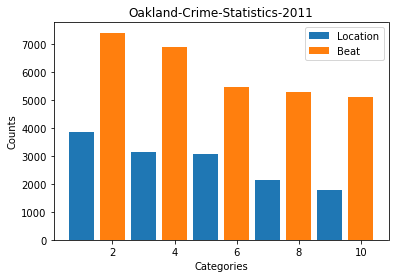

In [35]:
#Location和Beat直方图
plt.bar([1,3,5,7,9],[count_location[' INTERNATIONAL BLVD '],
                     count_location[' MACARTHUR BLVD '],
                     count_location[' AV&INTERNATIONAL BLVD '],
                     count_location[' BROADWAY  '],
                     count_location[' FOOTHILL BLVD ']], label='Location')

plt.bar([2,4,6,8,10],[count_beat['04X'],count_beat['08X'],
                      count_beat['26Y'],count_beat['30Y'],
                      count_beat['06X']], label='Beat')
plt.legend()
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Oakland-Crime-Statistics-2011')
plt.show()